# Importing Libraries

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.datasets import load_digits
digits = load_digits()
from sklearn import decomposition
from sklearn import metrics
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import train_test_split

# Importing dataset

In [7]:
# import dataset
df1=pd.read_csv("D:\College Stuffs\Machine learning project\class.csv")
df2=pd.read_csv("D:\College Stuffs\Machine learning project\zoo1.csv")
print(df1.describe())
print(df2.describe())

       Class_Number  Number_Of_Animal_Species_In_Class
count      7.000000                           7.000000
mean       4.000000                          14.428571
std        2.160247                          12.895182
min        1.000000                           4.000000
25%        2.500000                           6.500000
50%        4.000000                          10.000000
75%        5.500000                          16.500000
max        7.000000                          41.000000
             hair    feathers        eggs        milk    airborne     aquatic  \
count  101.000000  101.000000  101.000000  101.000000  101.000000  101.000000   
mean     0.425743    0.198020    0.584158    0.405941    0.237624    0.356436   
std      0.496921    0.400495    0.495325    0.493522    0.427750    0.481335   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      0.000000  

# Describing dataset

In [11]:
df1.head()

,Class_Number,Number_Of_Animal_Species_In_Class,Class_Type,Animal_Names
0,1,41,Mammal,"aardvark, antelope, bear, boar, buffalo, calf,..."
1,2,20,Bird,"chicken, crow, dove, duck, flamingo, gull, haw..."
2,3,5,Reptile,"pitviper, seasnake, slowworm, tortoise, tuatara"
3,4,13,Fish,"bass, carp, catfish, chub, dogfish, haddock, h..."
4,5,4,Amphibian,"frog, frog, newt, toad"


In [12]:
df2.head()

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


# Trying to understand the corelations and PCA within the features

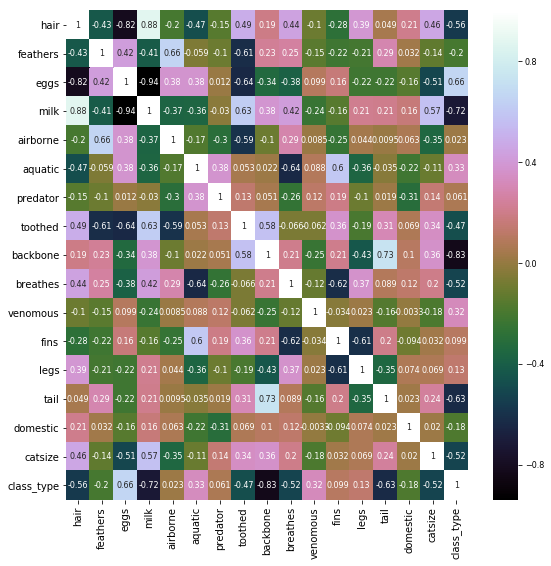

In [13]:
correlation = df2.corr()
f, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 8})
sns.heatmap(correlation, vmax=1,annot=True,cmap='cubehelix')

# Few observations from the heatmap of correlation matrix

There is a very strong correlation between the following types of features:

Having hair means it is very unlikely that the animal lays eggs & very likely that it gives milk
Having feathers has a relatively high correlation with the animal being airborne and low correlation with it having teeth
If the animal lays eggs, it is very unlikely that it gives milk, similar low correlation for having teeth
If it is aquatic relatively high corrrelation for having fins & so on

In [14]:
a = df2.iloc[:,1:17].values
b = df2.iloc[:,17].values
print(a[2],b[2])

[0 0 1 0 0 1 1 1 1 0 0 1 0 1 0 0] 4


In [17]:
#Classifiying data and target
X = df2.iloc[:,1:17].values   # Not considering the name of the animal - placing it 
y = df2.iloc[:,17].values     # Class number to be assigned (labels)

# Separating into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

In [22]:
# Have to include cross validation here as the sample size is too less

In [23]:
b = df2.columns.values
index = [0,17]
feature_names = np.delete(b,index)
feature_names

array(['hair', 'feathers', 'eggs', 'milk', 'airborne', 'aquatic',
       'predator', 'toothed', 'backbone', 'breathes', 'venomous', 'fins',
       'legs', 'tail', 'domestic', 'catsize'], dtype=object)

In [24]:
target_names = np.array(df1['Class_Type'])
target_names

array(['Mammal', 'Bird', 'Reptile', 'Fish', 'Amphibian', 'Bug',
       'Invertebrate'], dtype=object)

In [25]:
#Standardizing data

from sklearn.preprocessing import StandardScaler
X_std = StandardScaler().fit_transform(X_train)

C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


# PCA

Trying to reduce the number of features considered here - with PCA

In [26]:
#pca = decomposition.PCA(n_components=3)
#pca.fit(X)
#X = pca.transform(X)

# Trying different models

# K-NN

In [27]:
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       1.00      0.94      0.97        16
          2       1.00      1.00      1.00         7
          3       0.00      0.00      0.00         4
          4       0.67      1.00      0.80         8
          5       0.50      1.00      0.67         1
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         2

avg / total       0.83      0.88      0.84        41

[[15  0  0  1  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  3  1  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Gaussian Naive Bayes

In [28]:
# Fitting a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.50      1.00      0.67         1
         Bug       1.00      1.00      1.00         3
Invertebrate       0.40      1.00      0.57         2

 avg / total       0.86      0.90      0.87        41

[[16  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  0  1  0  3]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# SVM

In [29]:
from sklearn import svm
model = svm.LinearSVC()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.25      1.00      0.40         1
         Bug       1.00      1.00      1.00         3
Invertebrate       0.67      1.00      0.80         2

 avg / total       0.87      0.90      0.88        41

[[16  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  0  3  0  1]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Trees

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model

print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        16
        Bird       1.00      1.00      1.00         7
     Reptile       1.00      0.75      0.86         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.50      1.00      0.67         1
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

 avg / total       0.99      0.98      0.98        41

[[16  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  3  0  1  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0 

Trying to print the decision tree below:

In [34]:
from IPython.display import Image
from sklearn import tree
#import pydot
import pydotplus as pydot

dot_data = tree.export_graphviz(model, out_file=None, 
                         feature_names=feature_names,  
                         class_names=target_names,  
                         filled=True, rounded=True,  
                         special_characters=True)  
#graph = pydot.graph_from_dot_data(dot_data)  
#Image(graph.create_png())

ModuleNotFoundError: No module named 'pydotplus'

# Random Forest

In [35]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

      Mammal       0.94      0.94      0.94        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.25      1.00      0.40         1
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

 avg / total       0.86      0.88      0.86        41

[[15  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 1  0  0  0  3  0  0]
 [ 0  0  0  8  0  

In [36]:
df3 = df2.loc[df2['class_type'].isin([3,5])]
df3

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
25,frog,0,0,1,0,0,1,1,1,1,1,0,0,4,0,0,0,5
26,frog,0,0,1,0,0,1,1,1,1,1,1,0,4,0,0,0,5
52,newt,0,0,1,0,0,1,1,1,1,1,0,0,4,1,0,0,5
62,pitviper,0,0,1,0,0,0,1,1,1,1,1,0,0,1,0,0,3
76,seasnake,0,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,3
80,slowworm,0,0,1,0,0,0,1,1,1,1,0,0,0,1,0,0,3
89,toad,0,0,1,0,0,1,0,1,1,1,0,0,4,0,0,0,5
90,tortoise,0,0,1,0,0,0,0,0,1,1,0,0,4,1,0,1,3
91,tuatara,0,0,1,0,0,0,1,1,1,1,0,0,4,1,0,0,3


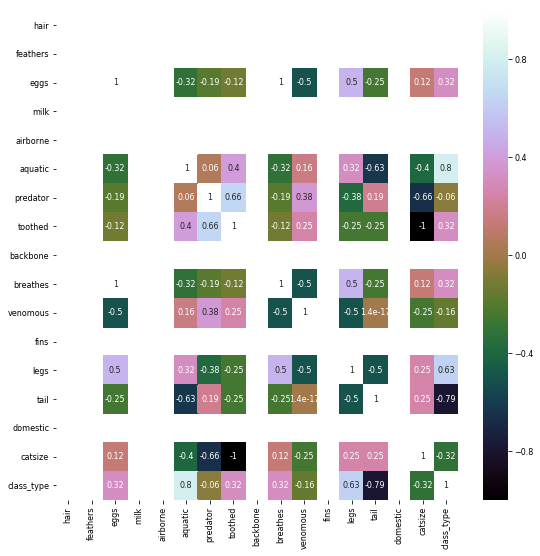

In [38]:
correlation = df3.corr()
f, ax = plt.subplots(figsize=(9, 9))
plt.rcParams.update({'font.size': 8})
sns.heatmap(correlation, vmax=1,annot=True,cmap='cubehelix')

In [39]:
from sklearn.ensemble import ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

# display the relative importance of each attribute
print("Importance percentages of each attribute" + "\n" + "------------")
for i in range(0,feature_names.shape[0]):
    print('%s\t%f' %(feature_names[i],model.feature_importances_[i] * 100) + '%')
    
from sklearn.feature_selection import RFE
rfe = RFE(model, 10)
rfe = rfe.fit(X, y)

# summarize the selection of the attributes
print(rfe.support_)
print(rfe.ranking_)

# Top 10 features
print("Selecting the following features:")
print(feature_names[rfe.support_ == True])

df_new = df2.drop('animal_name',axis=1)
for i in feature_names[rfe.support_ == False]:
    df_new = df_new.drop(i, axis=1)
    print ("Removing", i)
print(df_new)

#Classifiying data and target
X = df_new.iloc[:,0:10].values   # Not considering the name of the animal - placing it 
y = df_new.iloc[:,10].values     # Class number to be assigned (labels)

# Separating into test and training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=0)

Importance percentages of each attribute
------------
hair	13.820933%
feathers	13.563032%
eggs	6.530553%
milk	12.982272%
airborne	4.783517%
aquatic	4.025001%
predator	0.790551%
toothed	7.843501%
backbone	6.611021%
breathes	5.634222%
venomous	0.618852%
fins	9.622729%
legs	7.482838%
tail	5.263345%
domestic	0.075581%
catsize	0.352053%
[False  True  True  True False  True False  True  True  True False  True
  True  True False False]
[2 1 1 1 3 1 6 1 1 1 4 1 1 1 7 5]
Selecting the following features:
['feathers' 'eggs' 'milk' 'aquatic' 'toothed' 'backbone' 'breathes' 'fins'
 'legs' 'tail']
Removing hair
Removing airborne
Removing predator
Removing venomous
Removing domestic
Removing catsize
     feathers  eggs  milk  aquatic  toothed  backbone  breathes  fins  legs  \
0           0     0     1        0        1         1         1     0     4   
1           0     0     1        0        1         1         1     0     4   
2           0     1     0        1        1         1         0     

# K-NN

For updated training and test data sets

In [40]:
from sklearn.neighbors import KNeighborsClassifier
# fit a k-nearest neighbor model to the data
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')
             precision    recall  f1-score   support

          1       0.94      0.94      0.94        16
          2       1.00      1.00      1.00         7
          3       0.00      0.00      0.00         4
          4       0.67      1.00      0.80         8
          5       1.00      1.00      1.00         1
          6       1.00      1.00      1.00         3
          7       1.00      1.00      1.00         2

avg / total       0.81      0.88      0.84        41

[[15  0  0  1  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 1  0  0  3  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [42]:
from sklearn import grid_search
parameters = {'max_depth':range(3,20)}
clf = grid_search.GridSearchCV(tree.DecisionTreeClassifier(), parameters, n_jobs=-1)
clf.fit(X=X, y=y)
tree_model = clf.best_estimator_
print (clf.best_score_, clf.best_params_)

ValueError: Parameter values for parameter (max_depth) need to be a sequence.

# Gaussian Naive Bayes

For dataset with updated features

In [43]:
# Fitting a Naive Bayes model to the data
model = GaussianNB()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None)
              precision    recall  f1-score   support

      Mammal       0.88      0.94      0.91        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.50      0.25      0.33         4
        Fish       0.89      1.00      0.94         8
   Amphibian       1.00      1.00      1.00         1
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

 avg / total       0.88      0.90      0.89        41

[[15  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 2  0  1  1  0  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


# SVM

In [44]:
from sklearn import svm
model = svm.LinearSVC()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0)
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       0.80      1.00      0.89         8
   Amphibian       0.50      1.00      0.67         1
         Bug       1.00      1.00      1.00         3
Invertebrate       0.67      1.00      0.80         2

 avg / total       0.83      0.90      0.86        41

[[16  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  2  1  0  1]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0  0  2]]


C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Decision Tree

In [46]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier()
model.fit(X_train,y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model

print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

      Mammal       1.00      1.00      1.00        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.20      1.00      0.33         1
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

 avg / total       0.88      0.90      0.89        41

[[16  0  0  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 0  0  0  0  4  0  0]
 [ 0  0  0  8  0  0  0]
 [ 0  0  0  0  1  0  0]
 [ 0  0  0  0  0  3  0]
 [ 0  0  0  0  0 

C:\Users\Barkha\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


# Random Forest

For dataset with updated features

In [47]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, y_train)

print(model)

# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted, target_names = target_names))
print(metrics.confusion_matrix(expected, predicted))

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)
              precision    recall  f1-score   support

      Mammal       0.94      0.94      0.94        16
        Bird       1.00      1.00      1.00         7
     Reptile       0.00      0.00      0.00         4
        Fish       1.00      1.00      1.00         8
   Amphibian       0.25      1.00      0.40         1
         Bug       1.00      1.00      1.00         3
Invertebrate       1.00      1.00      1.00         2

 avg / total       0.86      0.88      0.86        41

[[15  0  1  0  0  0  0]
 [ 0  7  0  0  0  0  0]
 [ 1  0  0  0  3  0  0]
 [ 0  0  0  8  0  